In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Load the dataset
df = pd.read_csv('chequing.csv')

C:\Users\joaju\AppData\Local\Temp\ipykernel_19736\191266890.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['spending'] = filtered_df['balance'].diff()
C:\Users\joaju\AppData\Local\Temp\ipykernel_19736\191266890.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['spending'] = -filtered_df['spending'][filtered_df['spending'] < 0]
C:\Users\joaju\AppData\Local\Temp\ipykernel_19736\191266890.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

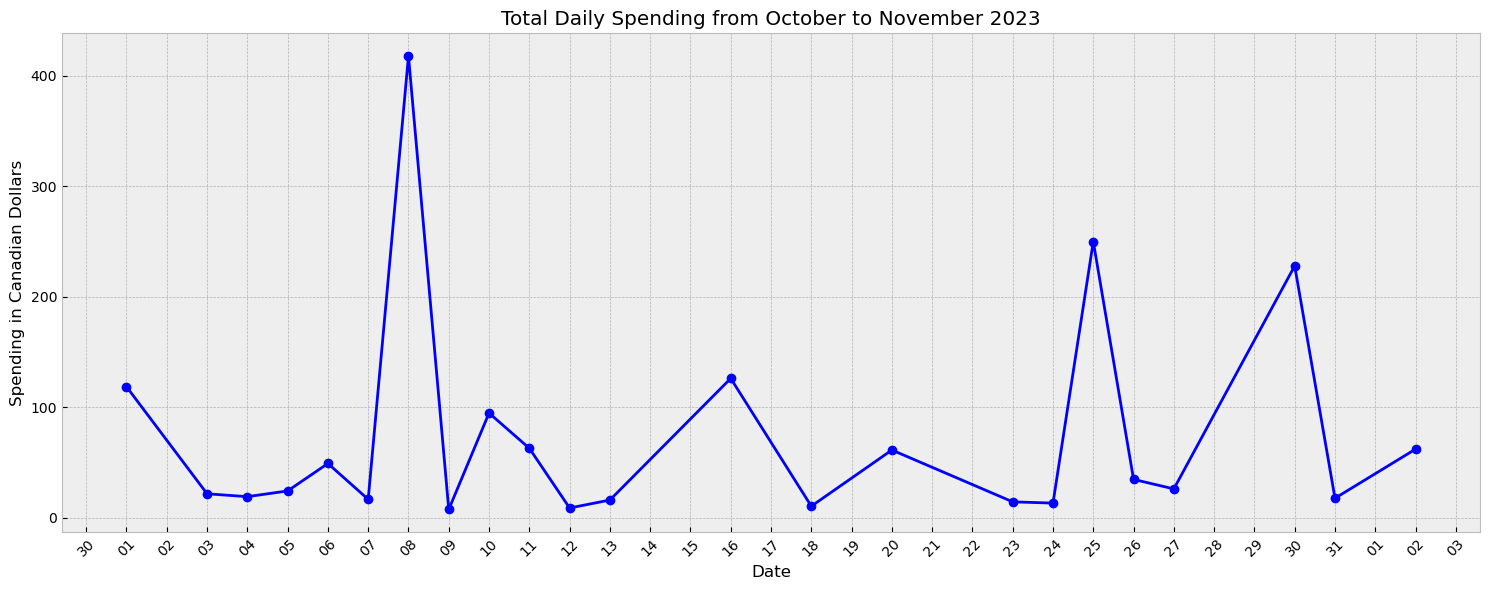

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with the date and balance columns
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')  # Make sure the data is sorted by date

# Filter the DataFrame to only include the desired date range
start_date = "2023-10-01"
end_date = "2023-11-30"
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
filtered_df = df.loc[mask]

# Calculate spending (change in balance)
filtered_df['spending'] = filtered_df['balance'].diff()

# Convert negative spending to positive values to represent actual spending
# Assuming 'balance' decreases with spending, thus negative 'diff' values represent spending
filtered_df['spending'] = -filtered_df['spending'][filtered_df['spending'] < 0]

# Fill NaN values with 0 for the first transaction or no spending
filtered_df['spending'].fillna(0, inplace=True)

# Aggregate spending by day
daily_spending = filtered_df.groupby(filtered_df['date'].dt.date)['spending'].sum()

# Plotting the aggregated daily spending as a line graph
plt.figure(figsize=(15, 6))  # Increased figure size for better visibility
plt.plot(daily_spending.index, daily_spending, color='blue', marker='o', linestyle='-')

plt.title('Total Daily Spending from October to November 2023')
plt.xlabel('Date')
plt.ylabel('Spending in Canadian Dollars')
plt.grid(True)

# Format the x-axis to show day of the month
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d'))  # Show day of the month only
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())  # Ensure a tick for every day

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Adjust the plot to ensure everything fits without overlapping
plt.tight_layout()
plt.show()


C:\Users\joaju\AppData\Local\Temp\ipykernel_19736\1891921521.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['spending'] = filtered_df['balance'].diff()
C:\Users\joaju\AppData\Local\Temp\ipykernel_19736\1891921521.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['spending'] = -filtered_df['spending'][filtered_df['spending'] < 0]
C:\Users\joaju\AppData\Local\Temp\ipykernel_19736\1891921521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

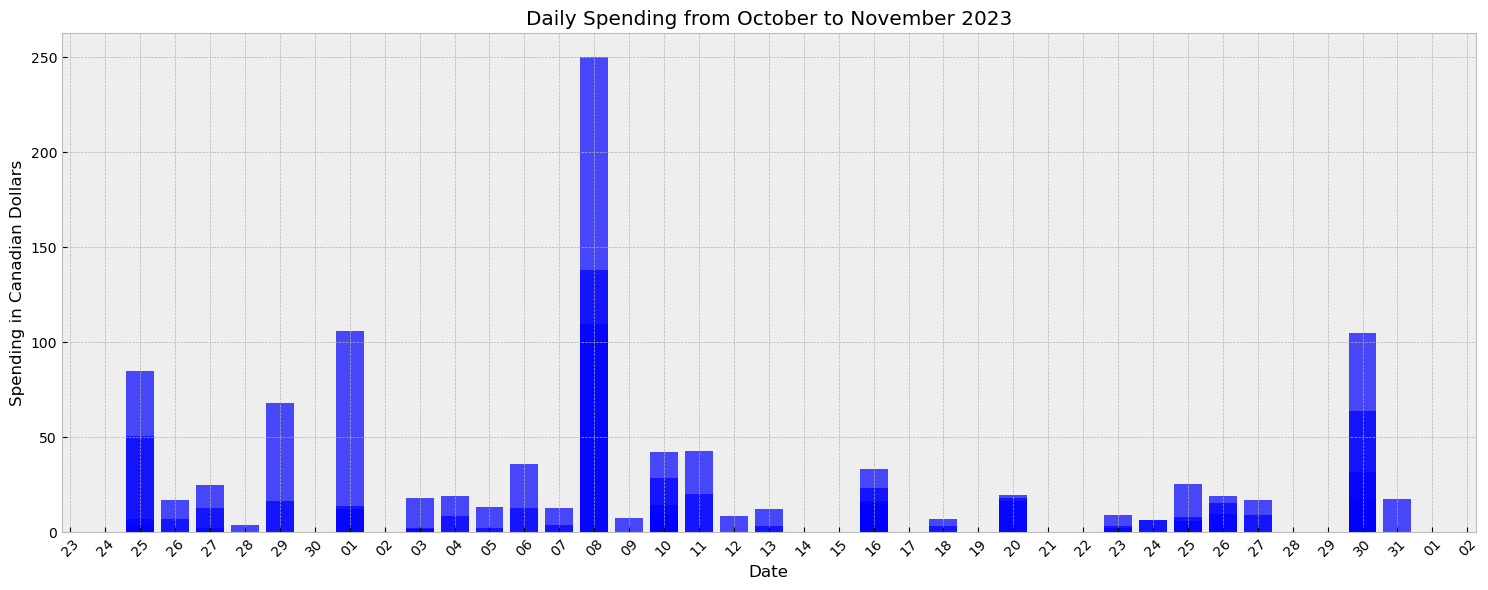

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with the date and balance columns
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')  # Make sure the data is sorted by date

# Filter the DataFrame to only include the desired date range
start_date = "2023-09-25"
end_date = "2023-11-01"
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
filtered_df = df.loc[mask]

# Calculate spending (change in balance)
filtered_df['spending'] = filtered_df['balance'].diff()

# Convert negative spending to positive values to represent actual spending
# Assuming 'balance' decreases with spending, thus negative 'diff' values represent spending
filtered_df['spending'] = -filtered_df['spending'][filtered_df['spending'] < 0]

# Fill NaN values with 0 for the first transaction or no spending
filtered_df['spending'].fillna(0, inplace=True)

# Plotting the spending over time for the filtered date range as a bar graph
plt.figure(figsize=(15, 6))  # Increased figure size for better visibility
plt.bar(filtered_df['date'], filtered_df['spending'], color='blue', alpha=0.7)

plt.title('Daily Spending from October to November 2023')
plt.xlabel('Date')
plt.ylabel('Spending in Canadian Dollars')
plt.grid(True)

# Format the date on the x-axis to show the day of the month only
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d'))  # Show day of the month only
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())  # Ensure a tick for every day

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Adjust the plot to ensure everything fits without overlapping
plt.tight_layout()
plt.show()
